# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | aginskoye
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | puerto baquerizo moreno
Processing Record 8 of Set 1 | kerikeri
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | kasongo-lunda
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | roxas
Processing Record 14 of Set 1 | san andres
Processing Record 15 of Set 1 | camana
Processing Record 16 of Set 1 | tolanaro
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | taitung city
Processing Record 19 of Set 1 | konarka
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | turabah
Processing Rec

Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | mount gambier
Processing Record 35 of Set 8 | dunedin
Processing Record 36 of Set 8 | vizinga
Processing Record 37 of Set 8 | celestun
Processing Record 38 of Set 8 | wagar
Processing Record 39 of Set 8 | dajabon
Processing Record 40 of Set 8 | pergine valsugana
Processing Record 41 of Set 8 | flying fish cove
Processing Record 42 of Set 8 | kapuskasing
Processing Record 43 of Set 8 | rio grande
Processing Record 44 of Set 8 | polignano a mare
Processing Record 45 of Set 8 | binka
Processing Record 46 of Set 8 | ujae
Processing Record 47 of Set 8 | zhaobaoshan
Processing Record 48 of Set 8 | westport
Processing Record 49 of Set 8 | deschutes river woods
Processing Record 0 of Set 9 | puerto leguizamo
Processing Record 1 of Set 9 | charcas
Processing Record 2 of Set 9 | elkins
Processing Record 3 of Set 9 | brush
Processing Record 4 of Set 9 | barkot
Processing Record 5 of Set 9 | fu'an
Processing Record 6 of Set 9 

Processing Record 25 of Set 12 | skowhegan
Processing Record 26 of Set 12 | pyhajarvi
Processing Record 27 of Set 12 | sola
Processing Record 28 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 29 of Set 12 | yuzhno-kurilsk
Processing Record 30 of Set 12 | agat village
Processing Record 31 of Set 12 | fort st. john
Processing Record 32 of Set 12 | ardakan
Processing Record 33 of Set 12 | acapulco de juarez
Processing Record 34 of Set 12 | port blair
Processing Record 35 of Set 12 | tanjung pinang
Processing Record 36 of Set 12 | ambodifotatra
Processing Record 37 of Set 12 | miquelon
Processing Record 38 of Set 12 | minuyan
Processing Record 39 of Set 12 | tabou
Processing Record 40 of Set 12 | koknese
Processing Record 41 of Set 12 | richards bay
Processing Record 42 of Set 12 | mahabe
City not found. Skipping...
Processing Record 43 of Set 12 | garachico
Processing Record 44 of Set 12 | esquina
Processing Record 45 of Set 12 | tsiroanomandidy
Processing Record 46 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,279.84,90,99,1.61,CL,1697585751
1,aginskoye,51.1000,114.5300,274.50,76,77,6.39,RU,1697585752
2,adamstown,-25.0660,-130.1015,295.67,85,100,4.18,PN,1697585753
3,blackmans bay,-43.0167,147.3167,290.11,53,34,0.89,AU,1697585753
4,avarua,-21.2078,-159.7750,298.18,61,54,7.20,CK,1697585754


In [6]:
city_data_new = [(x - 273.15) for x in city_data_df["Max Temp"]]
city_data_df["Max Temp"] = city_data_new
city_data_new=[]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,6.69,90,99,1.61,CL,1697585751
1,aginskoye,51.1000,114.5300,1.35,76,77,6.39,RU,1697585752
2,adamstown,-25.0660,-130.1015,22.52,85,100,4.18,PN,1697585753
3,blackmans bay,-43.0167,147.3167,16.96,53,34,0.89,AU,1697585753
4,avarua,-21.2078,-159.7750,25.03,61,54,7.20,CK,1697585754


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.69,90,99,1.61,CL,1697585751
1,aginskoye,51.1000,114.5300,1.35,76,77,6.39,RU,1697585752
2,adamstown,-25.0660,-130.1015,22.52,85,100,4.18,PN,1697585753
3,blackmans bay,-43.0167,147.3167,16.96,53,34,0.89,AU,1697585753
4,avarua,-21.2078,-159.7750,25.03,61,54,7.20,CK,1697585754


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

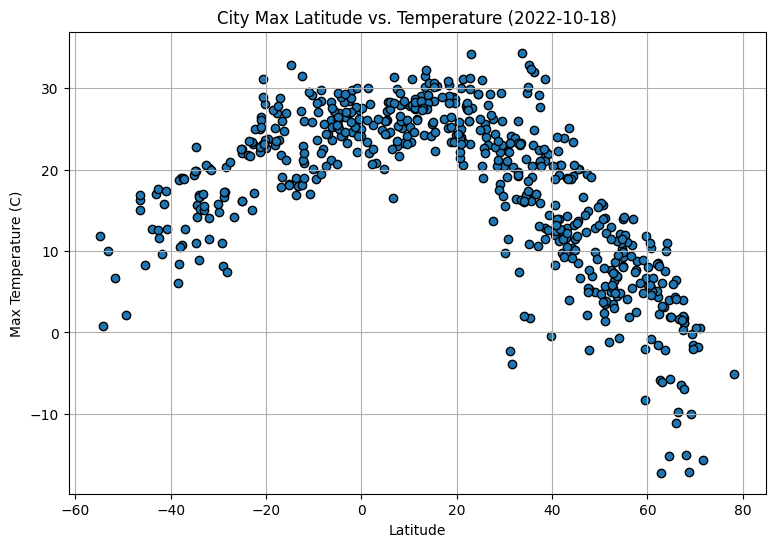

In [9]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
mt = city_data_df["Max Temp"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.scatter(lat, mt, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

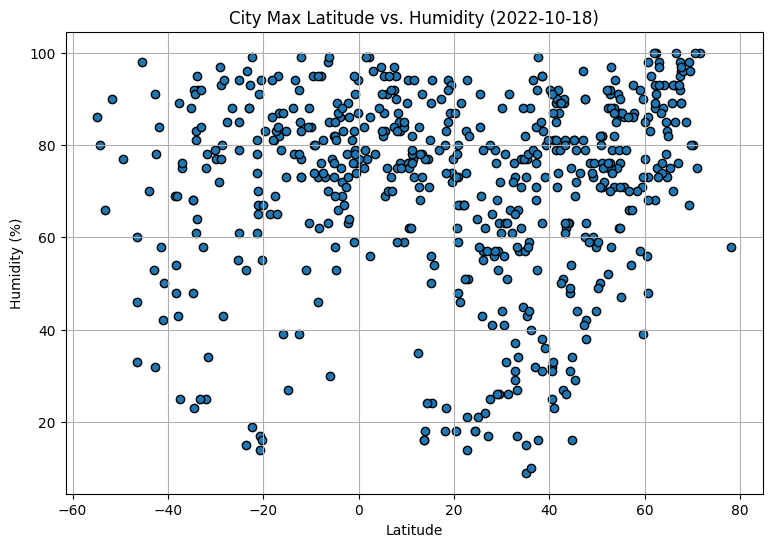

In [10]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
hd = city_data_df["Humidity"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(lat, hd, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

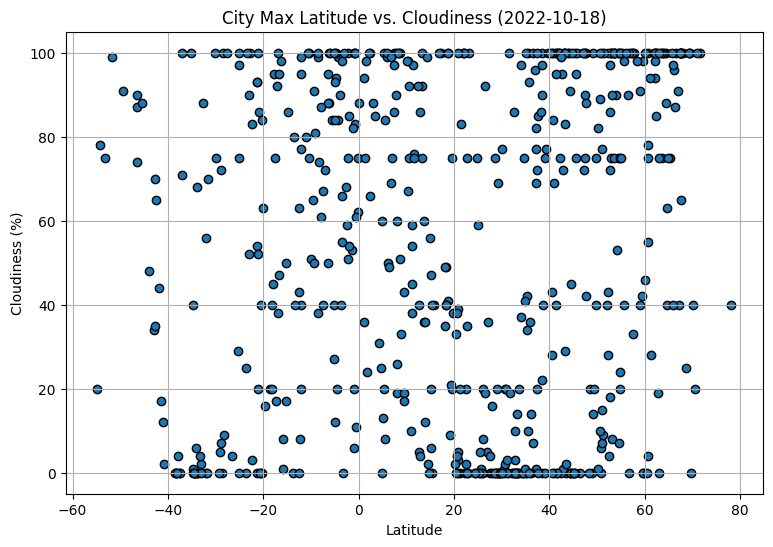

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
cld = city_data_df["Cloudiness"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(lat, cld, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

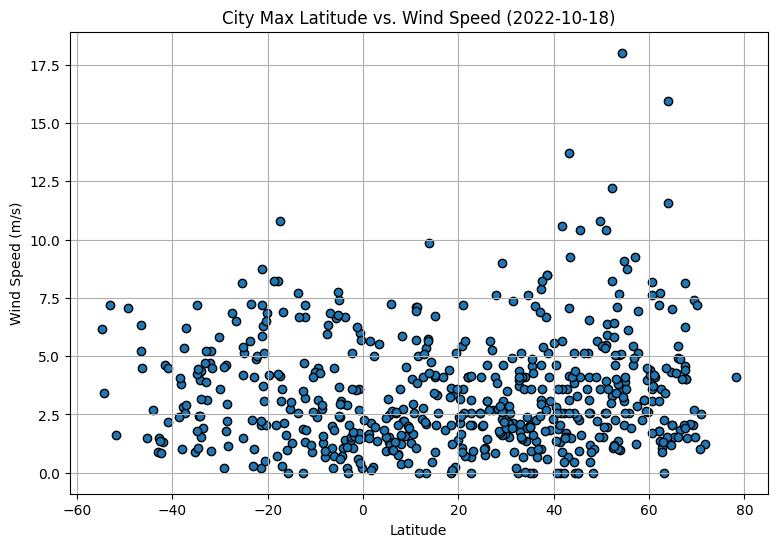

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
ws = city_data_df["Wind Speed"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.scatter(lat, ws, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
import numpy as np

def linearReg(x_values, y_values, xlabel, ylabel, label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    correlation = st.pearsonr(x_values, y_values)
    print(f"The r-value is: {round(correlation[0], 4)}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.annotate(line_eq, ( (np.mean(x_values) * 0.8) , (np.mean(y_values) * 0.8) ), color='r')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f"../output_data/LinReg{label}.png")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[ city_data_df["Lat"] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,aginskoye,51.1000,114.5300,1.35,76,77,6.39,RU,1697585752
5,utrik,11.2278,169.8474,27.47,82,45,7.10,MH,1697585754
10,dudinka,69.4058,86.1778,-0.18,98,100,2.68,RU,1697585758
12,roxas,11.5853,122.7511,26.19,73,76,5.01,PH,1697585759
13,san andres,12.5847,-81.7006,29.01,84,40,4.12,CO,1697585760


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[ city_data_df["Lat"] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.69,90,99,1.61,CL,1697585751
2,adamstown,-25.0660,-130.1015,22.52,85,100,4.18,PN,1697585753
3,blackmans bay,-43.0167,147.3167,16.96,53,34,0.89,AU,1697585753
4,avarua,-21.2078,-159.7750,25.03,61,54,7.20,CK,1697585754
6,puerto baquerizo moreno,-0.9000,-89.6000,25.55,83,20,3.60,EC,1697585755


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8336


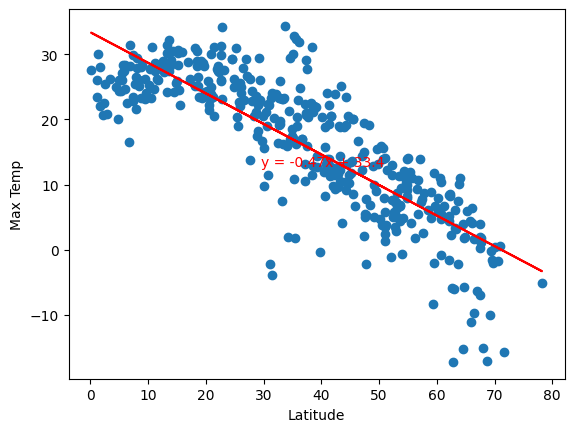

In [24]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots

linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Max Temp"], 
          xlabel="Latitude", 
          ylabel="Max Temp",
          label='North1'
         )


The r-value is: 0.7756


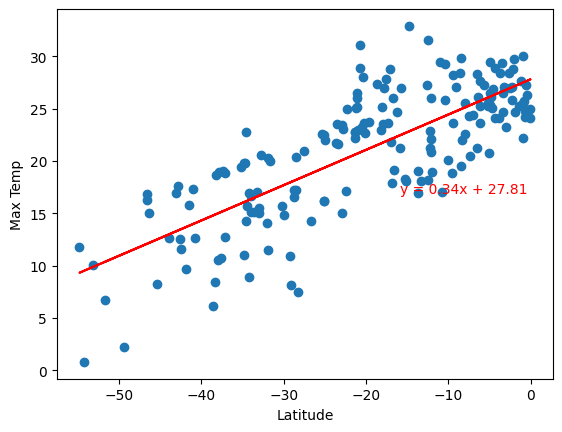

In [25]:
# Linear regression on Southern Hemisphere

linearReg(southern_hemi_df["Lat"], 
          southern_hemi_df["Max Temp"], 
          xlabel="Latitude", 
          ylabel="Max Temp",
          label='South1'
         )


**Discussion about the linear relationship:** Both relationships have a strong correlation. For our subset of northern hemiphere cities, the relationship between the latitude and max recorded temperature is negative as you move farther from the equator. On the other hand, the southern hemiphere cities have a strong positive relationship with max temperature as they get closer to the equator. This supports the leading hypothesis that temperatures increase as you move closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1361


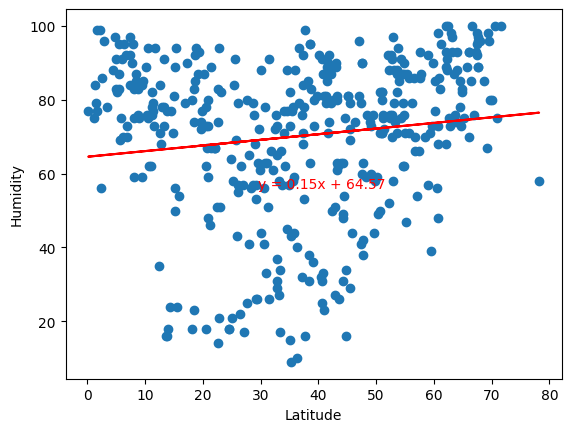

In [26]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Humidity"], 
          xlabel="Latitude", 
          ylabel="Humidity",
          label='North2'
         )


The r-value is: 0.1957


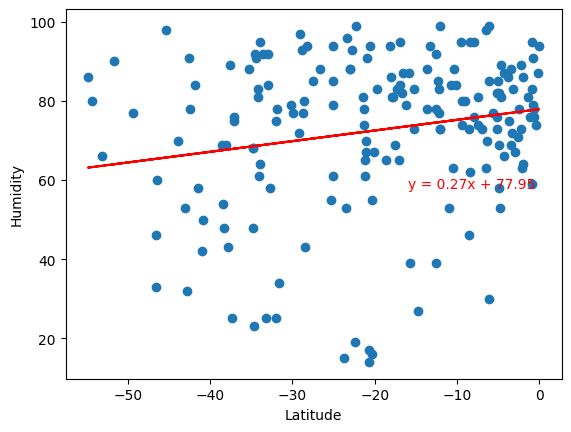

In [27]:
# Southern Hemisphere

linearReg(southern_hemi_df["Lat"],
          southern_hemi_df["Humidity"],
          xlabel="Latitude",
          ylabel="Humidity",
          label='South2'
         )


**Discussion about the linear relationship:** Both relationships are fairly weakly correlated. In both cases, the relationship between latitude and humidity trends slightly upward. However, it would be difficult to characterize this relationship as statistically significant.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1985


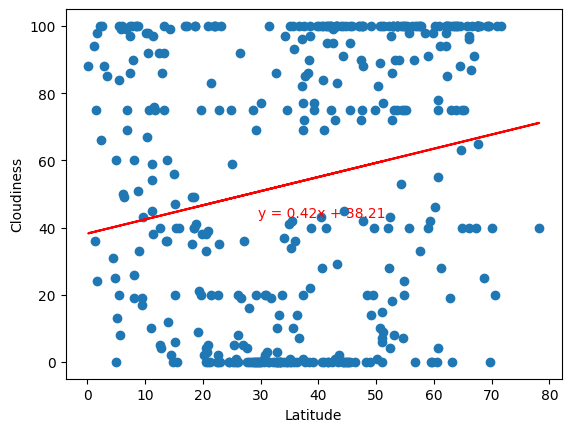

In [28]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Cloudiness"], 
          xlabel="Latitude", 
          ylabel="Cloudiness",
          label='North3'
         )


The r-value is: 0.2948


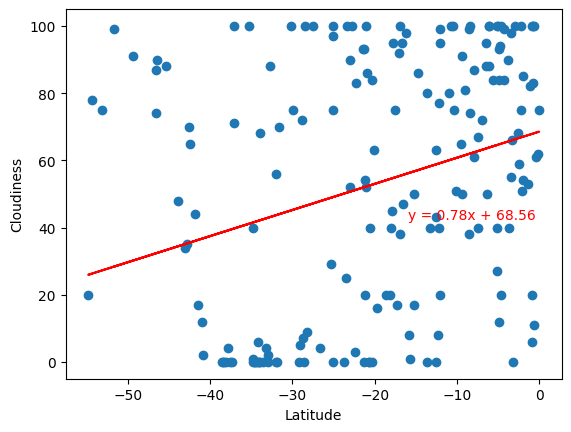

In [29]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"],
          southern_hemi_df["Cloudiness"],
          xlabel="Latitude",
          ylabel="Cloudiness",
          label='South3'
         )


**Discussion about the linear relationship:** Similar to the relationship between latitude and humidity, both relationships are loosely correlated. There is a slight upward trend, but the distribution of values across the plane is fairly random. One interesting takeaway is that the northern cities appear to be cloudier than the southern ones, but there are also more northern cities in the relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1958


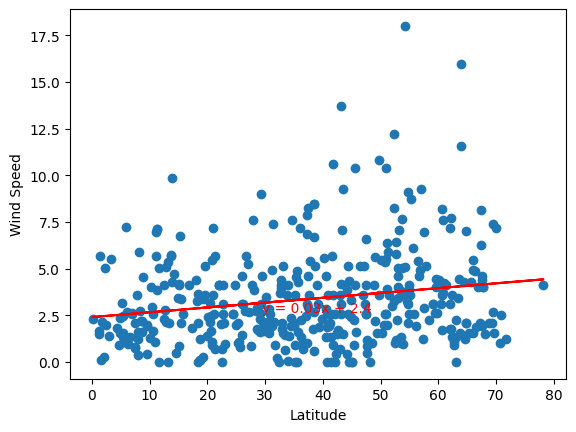

In [30]:
# Northern Hemisphere
linearReg(northern_hemi_df["Lat"], 
          northern_hemi_df["Wind Speed"], 
          xlabel="Latitude", 
          ylabel="Wind Speed",
          label='North4'
         )


The r-value is: -0.1287


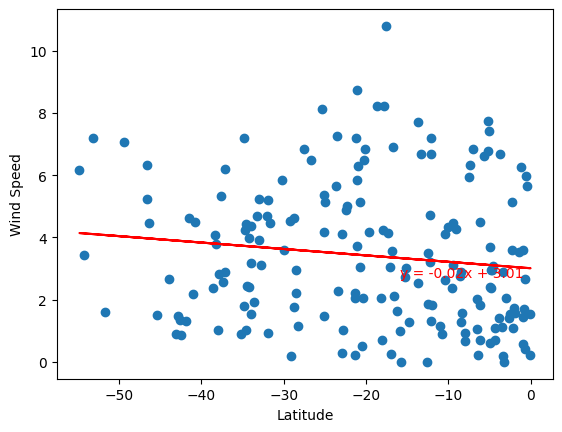

In [31]:
# Southern Hemisphere
linearReg(southern_hemi_df["Lat"],
          southern_hemi_df["Wind Speed"],
          xlabel="Latitude",
          ylabel="Wind Speed",
          label='South4'
         )


**Discussion about the linear relationship:** The relationship between latitude and wind speed is stronger than the correlation between latitude and cloudiness or humidity; however, not by a whole lot more. These data portray a pretty constant realtionship between latitude and wind speed that would most likely be support the null hypothesis. In other words, it seems likely that knowing the latitiude does not have any predictive power over the wind speed and vice versa. 